#  Competition: Housing Prices Competition for Kaggle Learn Users  
https://www.kaggle.com/c/home-data-for-ml-course

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from xgboost import XGBRegressor
import category_encoders as ce
import seaborn as sns
from sklearn.preprocessing import RobustScaler

In [2]:
train = pd.read_csv('train.csv', index_col = 0)

In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [4]:
test = pd.read_csv('test.csv', index_col = 0)

In [5]:
test.shape

(1459, 79)

In [6]:
target = train.SalePrice

In [7]:
train_test_df = pd.concat([train.iloc[:, :-1], test])

In [8]:
train_test_df.dropna(axis = 1, inplace = True)

In [9]:
train_test_df.ExterCond.value_counts()

TA    2538
Gd     299
Fa      67
Ex      12
Po       3
Name: ExterCond, dtype: int64

In [10]:
drop_cat = ['Street', 'LandContour', 'LotConfig', 'LandSlope', 'Condition1', 'Condition2',\
        'BldgType', 'RoofStyle', 'RoofMatl', 'Heating', 'ExterCond', 'CentralAir', \
        'HeatingQC', 'PavedDrive', 'SaleCondition']
cat = ['LotShape', 'Neighborhood', 'HouseStyle', 'ExterQual', 'Foundation']

In [11]:
encoder = LabelEncoder()
encoded = train_test_df[cat].apply(encoder.fit_transform)

In [12]:
data = train_test_df.drop(columns = drop_cat).drop(columns = cat).join(encoded)

In [13]:
data

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,...,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,LotShape,Neighborhood,HouseStyle,ExterQual,Foundation
Id,,,,,,,,,,,,,,,,,,,,,
1,60,8450,7,5,2003,2003,856,854,0,1710,...,0,0,0,2,2008,3,5,5,2,2
2,20,9600,6,8,1976,1976,1262,0,0,1262,...,0,0,0,5,2007,3,24,2,3,1
3,60,11250,7,5,2001,2002,920,866,0,1786,...,0,0,0,9,2008,0,5,5,2,2
4,70,9550,7,5,1915,1970,961,756,0,1717,...,0,0,0,2,2006,0,6,5,3,0
5,60,14260,8,5,2000,2000,1145,1053,0,2198,...,0,0,0,12,2008,0,15,5,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2915,160,1936,4,7,1970,1970,546,546,0,1092,...,0,0,0,6,2006,3,10,5,3,1
2916,160,1894,4,5,1970,1970,546,546,0,1092,...,0,0,0,4,2006,3,10,5,3,1
2917,20,20000,5,7,1960,1996,1224,0,0,1224,...,0,0,0,9,2006,3,11,2,3,1


In [14]:
X_train, X_test, y_train, y_test = train_test_split(data.iloc[:train.shape[0], :], \
                                                    target, test_size=0.2, random_state=42)

In [15]:
clf = LinearRegression()
clf.fit(X_train, y_train)
pred = clf.predict(X_test)
error = mean_absolute_error(y_test, pred)
error

22363.96632960884

In [16]:
clf = XGBRegressor(n_estimators=1000)
clf.fit(X_train, y_train)
pred = clf.predict(X_test)
error = mean_absolute_error(y_test, pred)
error

19498.49377943065

In [17]:
clf.fit(data.iloc[:train.shape[0], :], target)
pred = clf.predict(data.iloc[train.shape[0]:, :])

In [18]:
def write_to_submission_file(predicted_labels, out_file):
    # turn predictions into data frame and save as csv file
    predicted_df = pd.DataFrame({'Id': test.index, 'SalePrice': pred})
    predicted_df.to_csv(out_file, index = False)

In [19]:
write_to_submission_file(pred, 'submission.csv')

MAE: 21132.44610

In [20]:
def train_model(X):
    X_train, X_test, y_train, y_test = train_test_split(X.iloc[:train.shape[0], :], \
                                                    target, test_size=0.2, random_state=42)
    clf = XGBRegressor(n_estimators=1000)
    clf.fit(X_train, y_train)
    pred = clf.predict(X_test)
    error = mean_absolute_error(y_test, pred)
    return print('MAE:', error)

In [21]:
data_df = train_test_df.drop(columns = drop_cat).drop(columns = cat)

In [22]:
target_enc = ce.TargetEncoder(cols=cat)
target_enc.fit(train[cat], target)

# Transform the features, rename the columns with _target suffix, and join to dataframe
train_TE = data_df.join(target_enc.transform(train_test_df[cat]).add_suffix('_target'))

# Train a model
train_model(train_TE)

MAE: 18594.080024614726


In [23]:
clf = XGBRegressor(n_estimators=10000)
clf.fit(train_TE.iloc[:train.shape[0], :], target)
pred = clf.predict(train_TE.iloc[train.shape[0]:, :])

In [24]:
write_to_submission_file(pred, 'submission.csv')

MAE: 17800.22348

In [25]:
numeric_ = train_TE.select_dtypes(exclude=['object']).drop(['MSSubClass'], axis=1).copy()
numeric_.columns

Index(['LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold',
       'LotShape_target', 'Neighborhood_target', 'HouseStyle_target',
       'ExterQual_target', 'Foundation_target'],
      dtype='object')

In [26]:
cat_train = train_TE.select_dtypes(include=['object']).copy()
cat_train['MSSubClass'] = train_TE['MSSubClass']
cat_train.columns

Index(['MSSubClass'], dtype='object')

In [27]:
disc_num_var = ['OverallQual','OverallCond','FullBath','HalfBath',
                'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'MoSold', 'YrSold']

cont_num_var = []
for i in numeric_.columns:
    if i not in disc_num_var:
        cont_num_var.append(i)

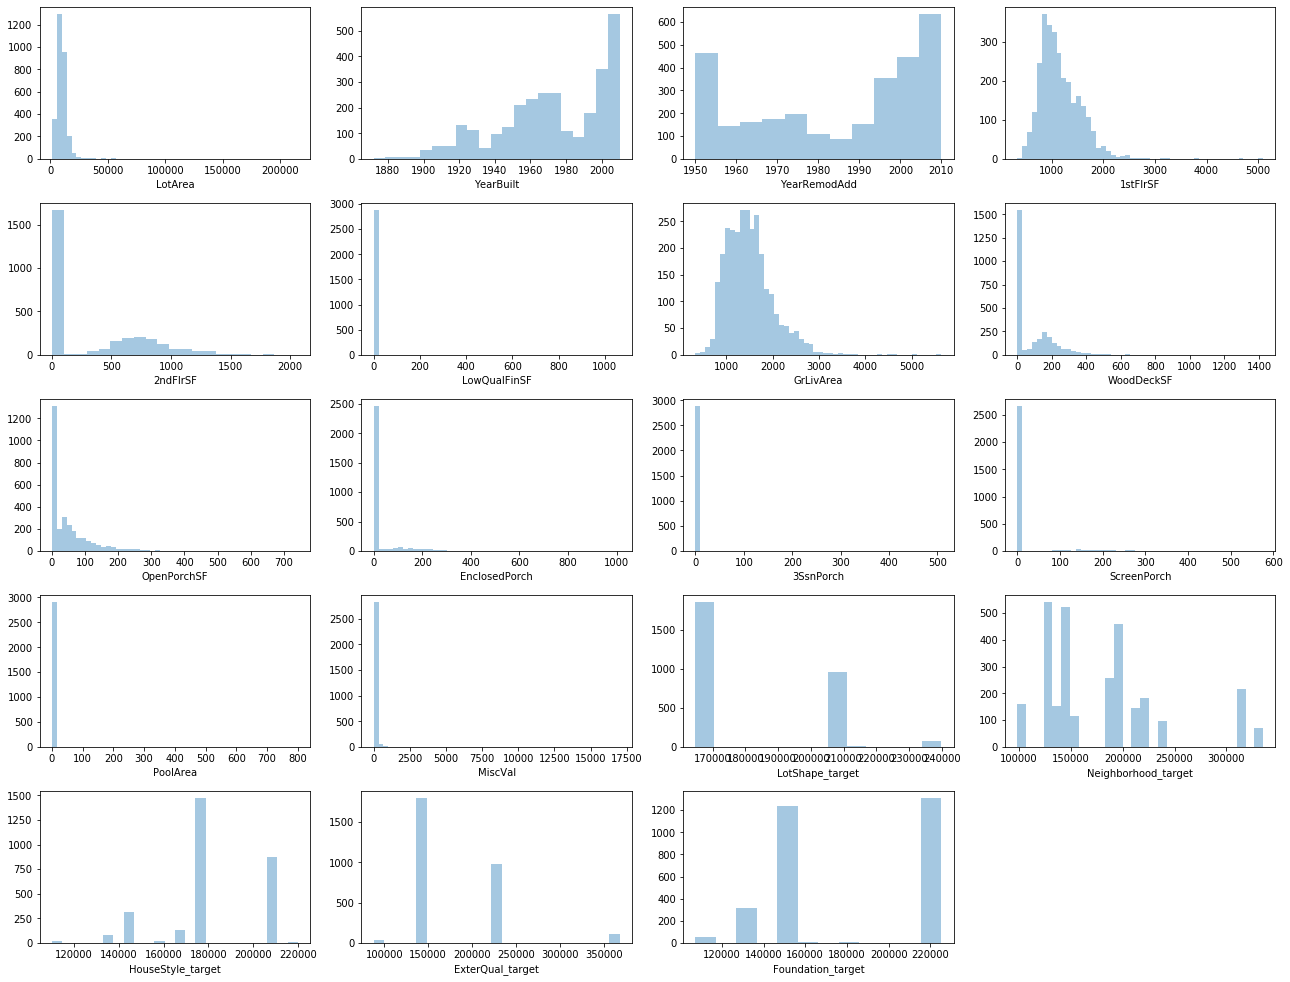

In [28]:
fig = plt.figure(figsize=(18,16))
for index,col in enumerate(cont_num_var):
    plt.subplot(6,4,index+1)
    sns.distplot(numeric_.loc[:,col].dropna(), kde=False)
fig.tight_layout(pad=1.0)

LowQualFinSF
EnclosedPorch
3SsnPorch
ScreenPorch
PoolArea
MiscVal


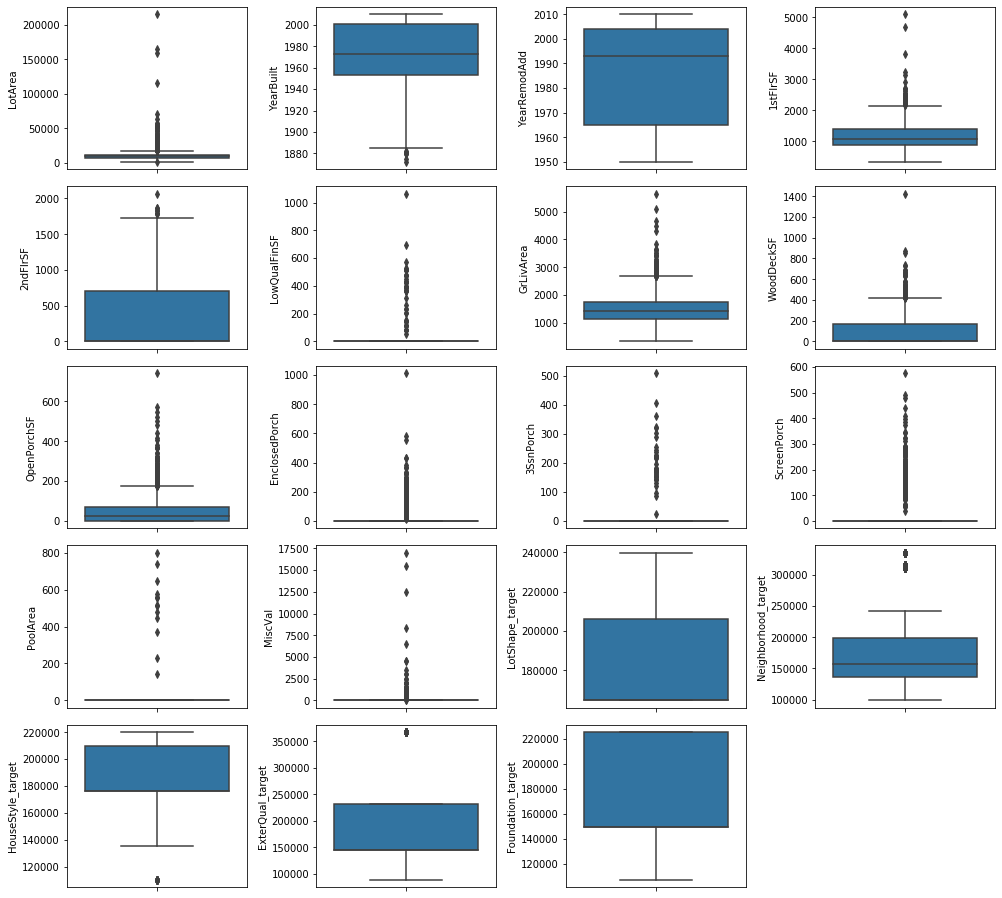

In [29]:
fig = plt.figure(figsize=(14,15))
for index,col in enumerate(cont_num_var):
    plt.subplot(6,4,index+1)
    sns.boxplot(y=col, data=numeric_.dropna())
fig.tight_layout(pad=1.0)

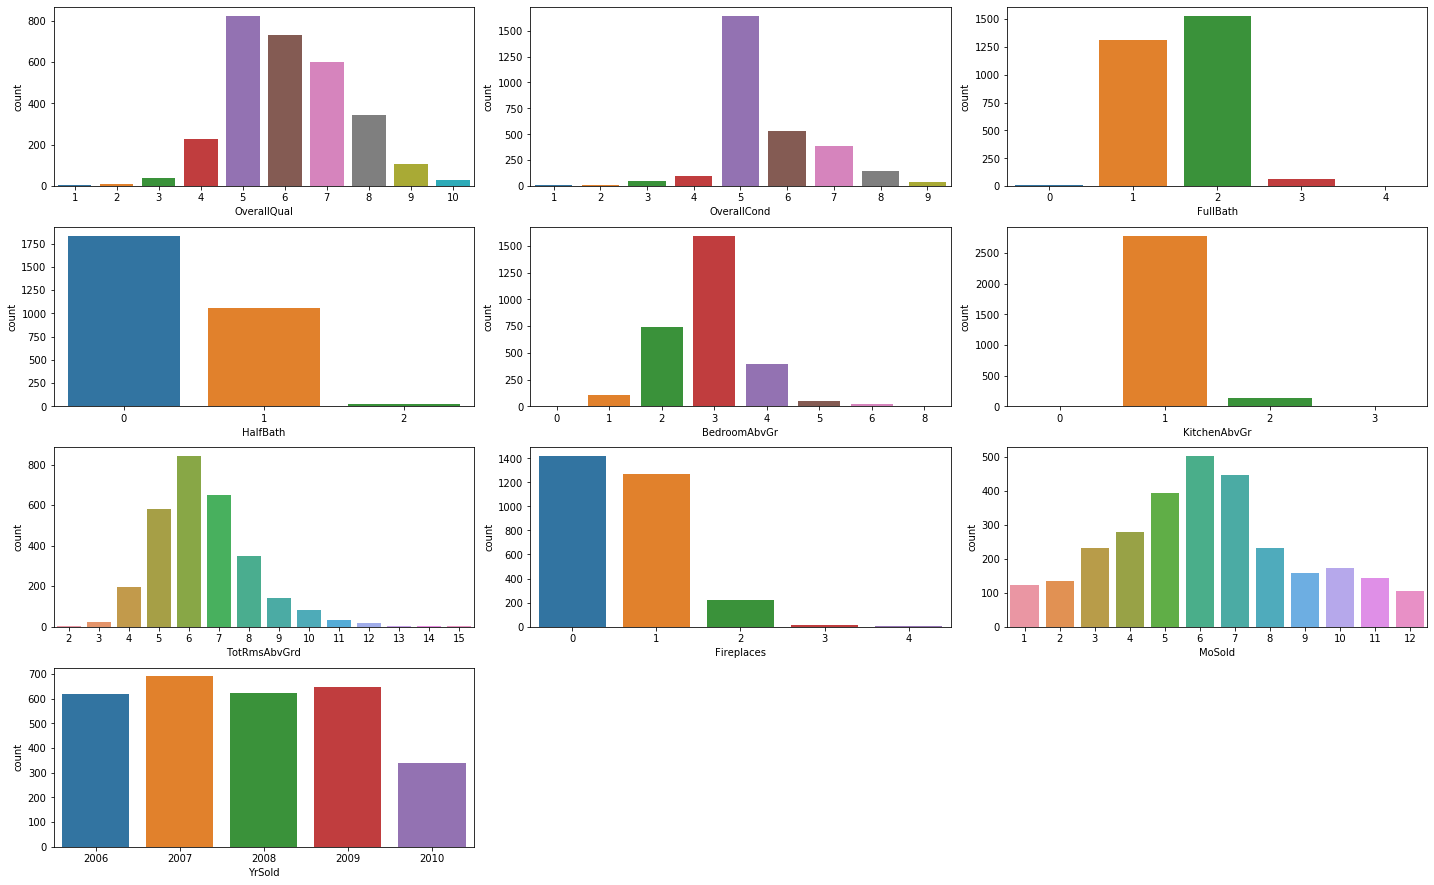

In [30]:
fig = plt.figure(figsize=(20,15))
for index,col in enumerate(disc_num_var):
    plt.subplot(5,3,index+1)
    sns.countplot(x=col, data=numeric_.dropna())
fig.tight_layout(pad=1.0)

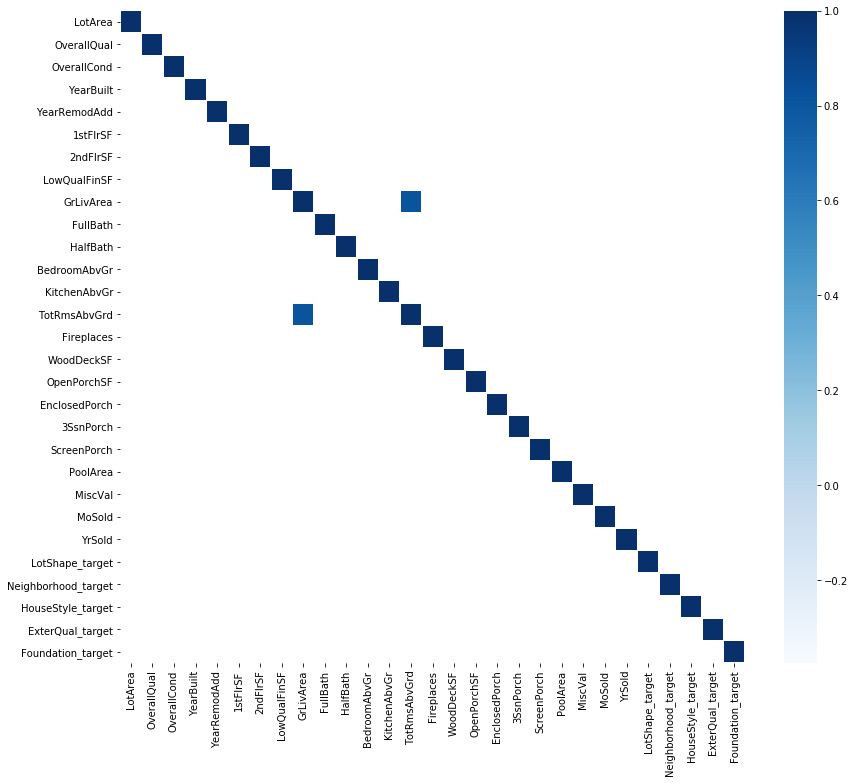

In [31]:
plt.figure(figsize=(14,12))
correlation = numeric_.corr()
sns.heatmap(correlation, mask = correlation <0.8, linewidth=0.5, cmap='Blues')

In [32]:
numeric_train = train.select_dtypes(exclude=['object'])
correlation = numeric_train.corr()
correlation[['SalePrice']].sort_values(['SalePrice'], ascending=False)

,SalePrice
SalePrice,1.000000
OverallQual,0.790982
GrLivArea,0.708624
GarageCars,0.640409
GarageArea,0.623431
TotalBsmtSF,0.613581
1stFlrSF,0.605852
FullBath,0.560664
TotRmsAbvGrd,0.533723
YearBuilt,0.522897


In [33]:
x = train_TE.loc[train.index]
y = target
test = train_TE.loc[test.index]

cols = x.select_dtypes(np.number).columns
transformer = RobustScaler().fit(x[cols])
x[cols] = transformer.transform(x[cols])
test[cols] = transformer.transform(test[cols])

X_train, X_val, y_train, y_val = train_test_split(x, y, test_size=0.2, random_state=42)

xgb = XGBRegressor(booster='gbtree', objective='reg:squarederror')

In [34]:
clf = XGBRegressor(n_estimators=10000)
clf.fit(train_TE.iloc[:train.shape[0], :], target)
pred = clf.predict(train_TE.iloc[train.shape[0]:, :])
write_to_submission_file(pred, 'submission.csv')

In [35]:
xgb.fit(x, y)
pred = xgb.predict(test)
write_to_submission_file(pred, 'submission.csv')

MAE: 17248.07802

In [36]:
y = np.log(target)
X_train, X_val, y_train, y_val = train_test_split(x, y, test_size=0.2, random_state=42)

param_lst = {
    'learning_rate' : [0.01, 0.1, 0.15],
    'n_estimators' : [1000, 5000, 10000],
    'max_depth' : [3, 9, 18],
    'min_child_weight' : [10, 30],
    'reg_alpha' : [0.001, 0.01, 0.1],
    'reg_lambda' : [0.001, 0.01, 0.0001]
}
xgb = XGBRegressor(booster = 'gbtree', objective='reg:squarederror')

X_train2, X_val2, y_train2, y_val2 = train_test_split(x, target, test_size=0.2, random_state=42)

xgb_reg = RandomizedSearchCV(estimator = xgb, param_distributions = param_lst,
                              n_iter = 100, scoring = 'neg_root_mean_squared_error',
                              cv = 5)
       
xgb_search = xgb_reg.fit(X_train, y_train)

# XGB with tune hyperparameters
best_param = xgb_search.best_params_
xgb = XGBRegressor(**best_param)

xgb2 = XGBRegressor(booster = 'gbtree', objective='reg:squarederror')
xgb_reg2 = RandomizedSearchCV(estimator = xgb2, param_distributions = param_lst,
                              n_iter = 100, scoring = 'neg_mean_absolute_error',
                              cv = 5)
       
xgb_search2 = xgb_reg2.fit(X_train2, y_train2)

# XGB with tune hyperparameters
best_param2 = xgb_search2.best_params_
xgb2 = XGBRegressor(**best_param2)

In [37]:
best_param2

{'reg_lambda': 0.01,
 'reg_alpha': 0.1,
 'n_estimators': 5000,
 'min_child_weight': 10,
 'max_depth': 3,
 'learning_rate': 0.01}

In [38]:
best_param

{'reg_lambda': 0.01,
 'reg_alpha': 0.001,
 'n_estimators': 5000,
 'min_child_weight': 10,
 'max_depth': 18,
 'learning_rate': 0.01}

In [39]:
xgb.fit(x, y)
pred = np.exp(xgb.predict(test))
write_to_submission_file(pred, 'submission.csv')

MAE 17022.81742

In [40]:
xgb2.fit(x, target)
pred = xgb2.predict(test)
write_to_submission_file(pred, 'submission.csv')

MAE 16753.24138

In [41]:
%%time
param_lst = {
    'learning_rate' : [0.01, 0.1, 0.15],
    'n_estimators' : [1000, 5000, 10000],
    'max_depth' : [3, 9, 18],
    'min_child_weight' : [10, 30],
    'reg_alpha' : [0.001, 0.01, 0.1],
    'reg_lambda' : [0.001, 0.01, 0.0001]
}
xgb_lin = XGBRegressor(booster = 'gbtree', objective='reg:tweedie')
xgb_lin = RandomizedSearchCV(estimator = xgb, param_distributions = param_lst,\
                             n_iter = 100, scoring = 'neg_root_mean_squared_error', cv = 5)      
xgb_search_lin = xgb_lin.fit(X_train, y_train)
# XGB with tune hyperparameters
best_param_lin = xgb_search_lin.best_params_
xgb_lin = XGBRegressor(**best_param_lin)
xgb2_lin = XGBRegressor(booster = 'gbtree', objective='reg:squarederror')
xgb_lin2 = RandomizedSearchCV(estimator = xgb2, param_distributions = param_lst,\
                              n_iter = 100, scoring = 'neg_mean_absolute_error', cv = 5)       
xgb_search2_lin = xgb_lin2.fit(X_train2, y_train2)
# XGB with tune hyperparameters
best_param2_lin = xgb_search2_lin.best_params_
xgb2_lin = XGBRegressor(**best_param2_lin)

CPU times: user 6h 58min 45s, sys: 3min 13s, total: 7h 1min 59s
Wall time: 1h 49min 53s


In [42]:
best_param_lin

{'reg_lambda': 0.01,
 'reg_alpha': 0.001,
 'n_estimators': 5000,
 'min_child_weight': 10,
 'max_depth': 18,
 'learning_rate': 0.01}

In [43]:
best_param2_lin

{'reg_lambda': 0.0001,
 'reg_alpha': 0.1,
 'n_estimators': 5000,
 'min_child_weight': 10,
 'max_depth': 3,
 'learning_rate': 0.01}

In [44]:
xgb_lin.fit(x, y)
pred = np.exp(xgb_lin.predict(test))
write_to_submission_file(pred, 'submission.csv')

MAE 17460.32533

In [45]:
xgb2_lin.fit(x, target)
pred = xgb2_lin.predict(test)
write_to_submission_file(pred, 'submission.csv')

MAE 16678.06982

In [46]:
%%time
param_lst = {
    'learning_rate' : [0.01, 0.1, 0.15],
    'n_estimators' : [1000, 5000, 10000],
    'max_depth' : [3, 9, 18],
    'min_child_weight' : [10, 30],
    'reg_alpha' : [0.001, 0.01, 0.1],
    'reg_lambda' : [0.001, 0.01, 0.0001]
}

xgb_tw = XGBRegressor(booster = 'gbtree', objective='reg:tweedie')
xgb_v2 = RandomizedSearchCV(estimator = xgb_tw, param_distributions = param_lst,\
                              n_iter = 100, scoring = 'neg_mean_absolute_error', cv = 5)       
xgb_search_tw = xgb_v2.fit(X_train2, y_train2)
# XGB with tune hyperparameters
best_param_tw = xgb_search_tw.best_params_
xgb_tw = XGBRegressor(**best_param_tw, booster = 'gbtree', objective='reg:tweedie')

CPU times: user 1h 59min 54s, sys: 1min 20s, total: 2h 1min 15s
Wall time: 31min 55s


In [47]:
best_param_tw

{'reg_lambda': 0.01,
 'reg_alpha': 0.001,
 'n_estimators': 5000,
 'min_child_weight': 30,
 'max_depth': 3,
 'learning_rate': 0.01}

In [48]:
xgb_tw.fit(x, target)
pred = xgb_tw.predict(test)
write_to_submission_file(pred, 'submission.csv')

In [49]:
pred

array([128089.766, 161177.42 , 187486.89 , ..., 161147.61 , 121247.05 ,
       197099.78 ], dtype=float32)

MAE 16536.73654

In [50]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectFromModel

def select_features_l1(X, y):
    logistic = LogisticRegression(C=0.1, penalty="l1", random_state=7, solver = 'liblinear').fit(X, y)
    model = SelectFromModel(logistic, prefit=True)

    X_new = model.transform(X)

    selected_features = pd.DataFrame(model.inverse_transform(X_new), 
                                        index=X.index,
                                        columns=X.columns)

    cols_to_keep = selected_features.columns[selected_features.var() != 0]

    return cols_to_keep

In [51]:
selected = select_features_l1(x, target)

In [52]:
selected

Index(['LotArea', 'OverallCond', 'LowQualFinSF', 'BedroomAbvGr', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'Neighborhood_target', 'HouseStyle_target',
       'ExterQual_target'],
      dtype='object')

In [53]:
x[selected]

,LotArea,OverallCond,LowQualFinSF,BedroomAbvGr,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,Neighborhood_target,HouseStyle_target,ExterQual_target
Id,,,,,,,,,,,,,,
1,-0.254076,0.0,0.0,0.0,0.000000,0.529412,0.0,0.0,0.0,0.0,0.0,0.186521,1.0,1.000000
2,0.030015,3.0,0.0,0.0,1.773810,-0.367647,0.0,0.0,0.0,0.0,0.0,0.853557,0.0,0.000000
3,0.437624,0.0,0.0,0.0,0.000000,0.250000,0.0,0.0,0.0,0.0,0.0,0.186521,1.0,1.000000
4,0.017663,0.0,0.0,0.0,0.000000,0.147059,272.0,0.0,0.0,0.0,0.0,0.393459,1.0,0.000000
5,1.181201,0.0,0.0,1.0,1.142857,0.867647,0.0,0.0,0.0,0.0,0.0,2.431471,1.0,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,-0.385746,0.0,0.0,0.0,0.000000,0.220588,0.0,0.0,0.0,0.0,0.0,0.102966,1.0,0.000000
1457,0.913167,1.0,0.0,0.0,2.077381,-0.367647,0.0,0.0,0.0,0.0,0.0,0.040774,0.0,0.000000
1458,-0.107831,4.0,0.0,1.0,0.000000,0.514706,0.0,0.0,0.0,0.0,2500.0,0.393459,1.0,2.554864


In [54]:
xgb_tw.fit(x[selected], target)
pred = xgb_tw.predict(test[selected])
write_to_submission_file(pred, 'submission.csv')

MAE: 33788.78993